---
# **Visualisering och tolkning av konvolutionella neurala nätverk.**
---
Konvolutionella neurala nätverk (CNN) är centrala inom datorseende och används för uppgifter som bildklassificering och objektigenkänning. Trots deras höga prestanda är CNN ofta svåra att tolka, vilket gör det svårt att förstå vilka delar av en bild som bidrar till modellens beslut.

AlexNet, en av de tidiga och välkända CNN-arkitekturerna, används ofta som exempelmodell för att studera nätverksbeteende. I detta labb används Grad-CAM (Gradient-weighted Class Activation Mapping) för att visualisera aktiveringar i nätverkets lager. Grad-CAM genererar värmekartor som framhäver de regioner i en bild som är mest avgörande för modellens prediktion, vilket möjliggör en intuitiv förståelse av hur AlexNet tolkar visuella mönster.

Syftet med denna laboration är att analysera och visualisera lager i AlexNet med Grad-CAM, för att undersöka hur nätverket bearbetar information steg för steg och vilka bildregioner som påverkar modellens beslut mest.

In [1]:
from torchinfo import summary
import utils as utils


In [2]:
device = utils.device_test()

Using device: cuda


---
# **ALexNet.**
---
AlexNet är en klassisk konvolutionell neural nätverksarkitektur som introducerades 2012. Modellen består av flera lager av konvolutioner (Conv2d), ReLU-aktiveringar och maxpooling, följt av fullt anslutna 
(fully connected) lager. Totalt innehåller AlexNet över 61 miljoner parametrar.

Visualiseringen sker med Grad-CAM, som genererar värmekartor som visar vilka delar av bilden som aktiverar varje lager mest. Detta ger en tydlig bild av hur AlexNet tolkar och representerar visuella mönster i olika djup av nätverket.

In [3]:
model, weights = utils.model(device)
summary(model, input_size=(1, 3, 224, 224))

Layer (type:depth-idx)                   Output Shape              Param #
AlexNet                                  [1, 1000]                 --
├─Sequential: 1-1                        [1, 256, 6, 6]            --
│    └─Conv2d: 2-1                       [1, 64, 55, 55]           23,296
│    └─ReLU: 2-2                         [1, 64, 55, 55]           --
│    └─MaxPool2d: 2-3                    [1, 64, 27, 27]           --
│    └─Conv2d: 2-4                       [1, 192, 27, 27]          307,392
│    └─ReLU: 2-5                         [1, 192, 27, 27]          --
│    └─MaxPool2d: 2-6                    [1, 192, 13, 13]          --
│    └─Conv2d: 2-7                       [1, 384, 13, 13]          663,936
│    └─ReLU: 2-8                         [1, 384, 13, 13]          --
│    └─Conv2d: 2-9                       [1, 256, 13, 13]          884,992
│    └─ReLU: 2-10                        [1, 256, 13, 13]          --
│    └─Conv2d: 2-11                      [1, 256, 13, 13]         

---
I detta labb fokuserar jag på att visualisera bara de fem konvolutionella lagren (lagren: 0, 3, 6, 8, 10), eftersom dessa lager extraherar visuella egenskaper från bilder steg för steg.

In [4]:
utils.show_con2d(model)


Conv2d-lager:
features.0 Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
--------------------------------------------------------------------------------
features.3 Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
--------------------------------------------------------------------------------
features.6 Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
--------------------------------------------------------------------------------
features.8 Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
--------------------------------------------------------------------------------
features.10 Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
--------------------------------------------------------------------------------


---
# **Analys av konvolutionella  lagren med Grad-Cam.**
---
Grad-CAM kommmer att användas för att visualisera vilka delar av en bild som har störst påverkan på modellens prediktion för en specifik klass, baserat på ett valt konvolutionellt lager. Olika lager i ett CNN lär sig olika nivåer av representationer, och med hjälp av Grad-CAM  kommer jag analysera hur modellens förståelse av bilden utvecklas genom nätverkets lager.

---
# **Katt.**
---

Den predikerade klassen för bilden är: TABBY.


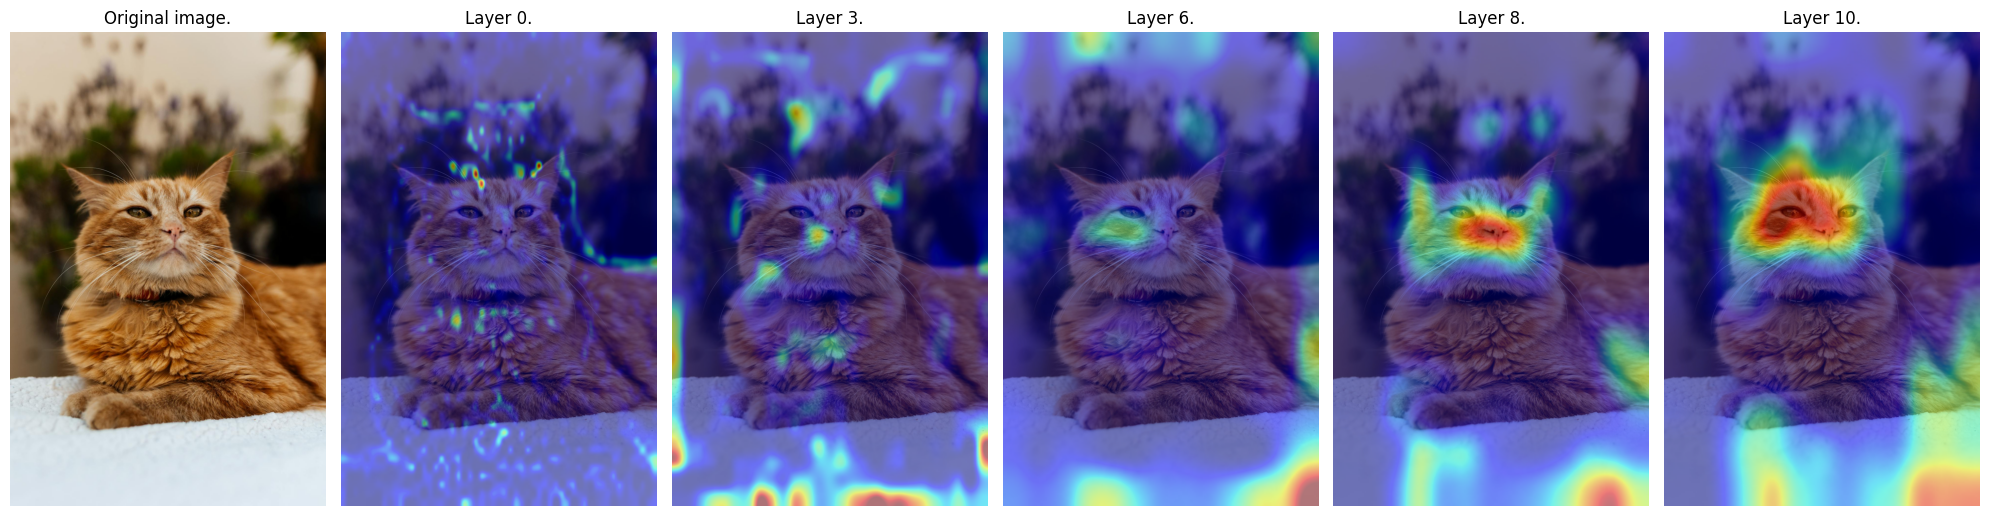

In [5]:
img1, tensor_img1 = utils.load_image('./image1.jpg', device, weights)
y_pred1 = utils.predict(model, weights, tensor_img1)
layer_number = [0, 3, 6, 8, 10]
utils.layers_vizualization(model, img1, tensor_img1, y_pred1, layer_number)


---
På den första bilden ser vi en katt, och AlexNet har klassificerat bilden som "tabby". En tabbykatt kännetecknas av ett specifikt pälsmönster som kan bestå av ränder, virvlar eller fläckar. Detta mönster är inte särskilt tydligt i bilden, men klassificeringen kan ändå betraktas som korrekt, eftersom modellen tydligt identifierar objektet som en katt.

För att bättre förstå modellens beslut analyserar vi aktiveringarna i de olika lagren och undersöker vilka områden i bilden som har störst påverkan på prediktionen för den aktuella klassen.

<u><b>Lager 0.</b></u>  I det första lagret observeras många utspridda aktiveringar. Dessa motsvarar främst konturer av objektet och strukturer i pälsen. Lagret reagerar huvudsakligen på enkla visuella drag såsom kanter och texturer, snarare än på katten som ett sammanhängande objekt.

<u><b>Lager 3.</b></u>  I detta lager blir aktiveringarna mer koncentrerade. Framför allt framträder området kring ansiktet och bröstområdet, samt golv/mark. Här börjar modellen kombinera enkla drag till mer komplexa mönster, vilket gör att delar av objektet kan identifieras.

<u><b>Lager 6.</b></u> Modellen uppvisar nu ett tydligt fokus på golv/mark där ligger katten, mitten av kattens ansikte, samt golv/mark. Bakgrunden får betydligt mindre uppmärksamhet.

<u><b>Lager 8.</b></u> Mycket starka aktiveringar syns över hela ansiktet, särskilt kring näsan, ögonen området mellan dem. Lika stora aktiveringar på golv/mark. I detta lagern har modellen identifierat de mest informativa delarna av bilden för klassificeringen.

<u><b>Lager 10.</b></u> I det sista, djupa lagret ligger fokus nästan uteslutande på kattens ansikte och där den ligger, det som är mest avgörande för den slutliga klassificeringen.

---
# **Bil.**
---

Den predikerade klassen för bilden är: SPORTS CAR.


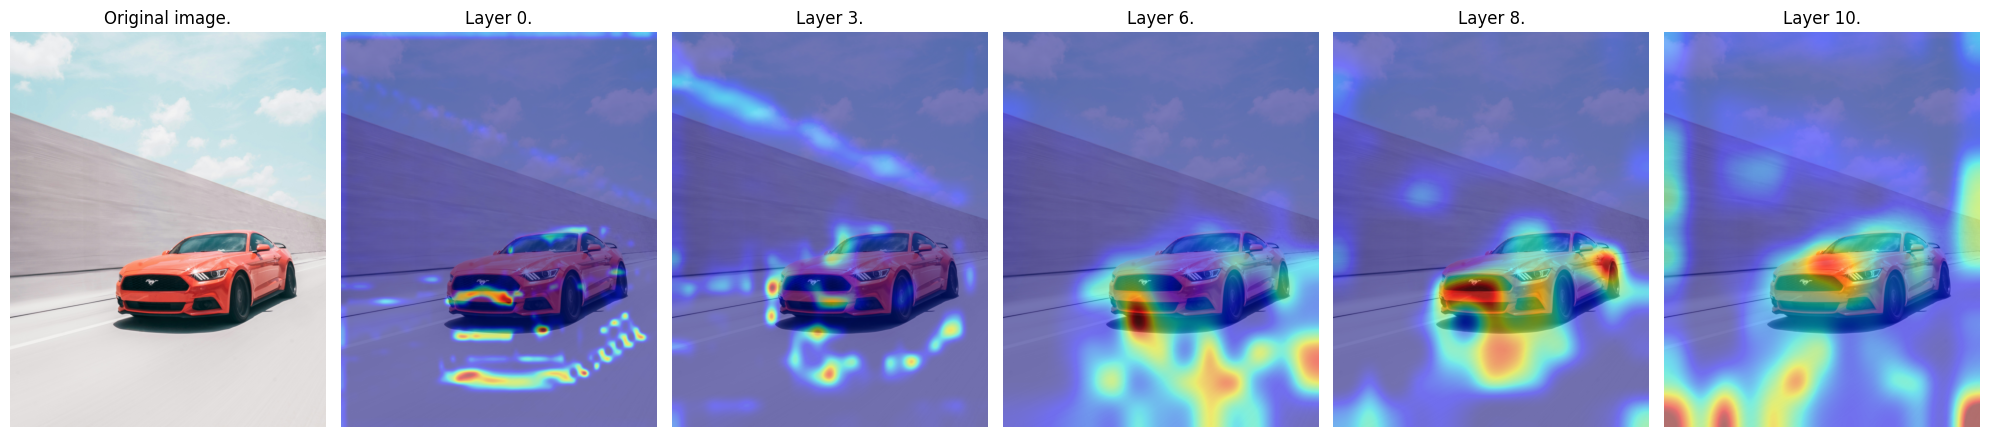

In [6]:
img2, tensor_img2 = utils.load_image('./image2.jpg', device, weights)
y_pred2 = utils.predict(model, weights, tensor_img2)
layer_number = [0, 3, 6, 8, 10]
utils.layers_vizualization(model, img2, tensor_img2, y_pred2, layer_number)


Den predikerade klassen för bilden är: BEACH WAGON.


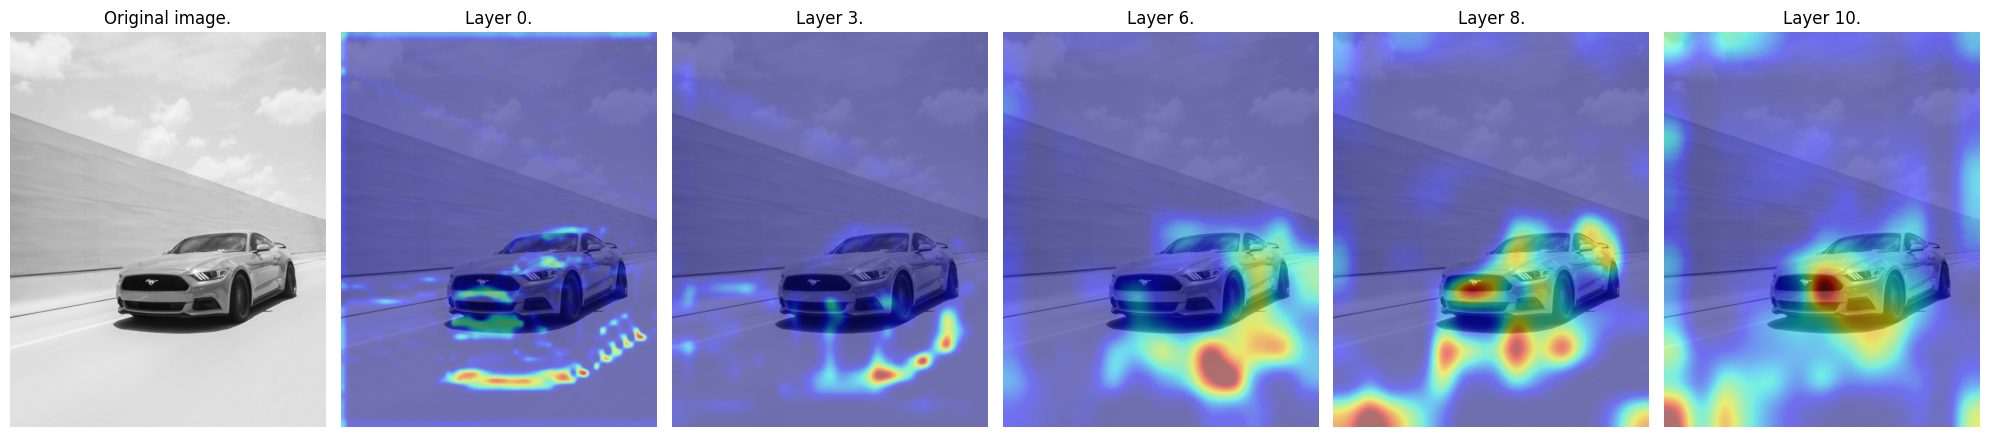

In [7]:
img2bw, tensor_img2bw = utils.load_image('./image2(1).jpg', device, weights)
y_pred2bw = utils.predict(model, weights, tensor_img2bw)
layer_number = [0, 3, 6, 8, 10]
utils.layers_vizualization(model, img2bw, tensor_img2bw, y_pred2bw, layer_number)

---
För att undersöka modellen på ett djupare sätt analyseras samma bild av en bil i två varianter: en färgbild och en svartvit version.

Den färgade bilden klassificeras av AlexNet som "sports car", vilket är korrekt. Den svartvita bilden klassificeras däremot som "beach wagon", vilket är felaktigt. Detta fenomen diskuteras vidare i slutsatsen. Trots skillnaden i predikterad klass är aktiveringsmönstren i Grad-CAM till stor del mycket lika mellan de två bildvarianterna.


<u><b>Lager 0.</b></u>  I det första lagret markeras områden såsom bilens grill, tak, delar av hjulen samt väggarnas texturer. Lagret reagerar främst på kanter och texturer, och bilen uppfattas ännu inte som ett sammanhängande objekt.

<u><b>Lager 3.</b></u>  I detta lager koncentreras aktiveringarna mer mot bilens front och strålkastare, samtidigt som viss aktivering fortfarande förekommer i väggtexturen och bakgrunden.

<u><b>Lager 6.</b></u> Modellen uppvisar nu ett tydligare fokus, inte enbart på bilen utan även på vägen/asfalten. Bakgrunden får däremot betydligt mindre uppmärksamhet. Här börjar nätverket kombinera olika delar till en mer sammanhängande objektrepresentation för klassificering.

<u><b>Lager 8.</b></u> I detta lager ligger fokus nästan helt på bilen: bilens front, området kring logotypen samt delar av bakpartiet. Dessa regioner fungerar som de mest informativa och diskriminerande dragen för fordonsklassen.

<u><b>Lager 10.</b></u> I det sista, djupa lagret observeras mycket starka aktiveringar på den främre delen av bilen och generellt över hela bilen, samt delvis på vägen/asfalten. Detta indikerar att dessa områden är mest avgörande för modellens slutliga klassificering.

---
# **Slutsats.**
---
I denna laboration har Grad-CAM använts för att analysera hur AlexNet fattar beslut vid bildklassificering genom att visualisera vilka delar av bilden som har störst påverkan på modellens prediktion. Genom att studera aktiveringar i olika konvolutionella lager har det varit möjligt att följa hur nätverket stegvis går från enkla visuella drag till mer komplexa och representationer.

Resultaten visar ett tydligt mönster där tidiga lager främst reagerar på lågnivåegenskaper såsom kanter och texturer, medan mellandjupa lager börjar identifiera delar av objekt. I de djupaste lagren fokuserar modellen på de regioner som är mest avgörande för den slutliga klassificeringen.

Vid en jämförelse mellan aktiveringsmönstren för katten och bilen framgår det att modellen anpassar sin uppmärksamhet beroende på objekttyp. För djur koncentreras aktiveringarna huvudsakligen till ansiktsregioner, såsom ögon och nos, medan klassificeringen av bilen i större utsträckning baseras på geometriska och funktionella komponenter, exempelvis bilens form, strålkastare och grill.

I båda fallen kan man även observera att nätverket uppmärksammar markrelaterade områden i bilden, såsom golv i kattbilden och väg eller asfalt i bilbilden. Detta tyder på att kontextuella ledtrådar, exempelvis information om var objektet befinner sig i scenen, kan bidra till modellens prediktion.

Experimentet med färg- respektive svartvita bilder visar vidare att färginformation kan spela en viktig roll vid klassificering. Trots att aktiveringsmönstren till stor del är lika mellan de två bildvarianterna leder avsaknaden av färg till en felklassificering i det svartvita fallet. Detta indikerar att färg fungerar som en kompletterande egenskap för modellen.

Sammanfattningsvis visar analysen att Grad-CAM är ett kraftfullt verktyg för att öka transparensen i djupa neurala nätverk. Metoden ger en bättre förståelse för vilka bildregioner som är avgörande för modellens beslut och belyser samtidigt både modellens styrkor och dess begränsningar.